In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\aanus\Downloads\smart_home_energy_consumption (1).csv")


In [2]:
print(df.info())   # Check data types and structure



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    2500 non-null   object 
 1   Home_ID                 2500 non-null   object 
 2   City                    2500 non-null   object 
 3   Energy_Consumption_kWh  2450 non-null   float64
 4   Occupancy               2500 non-null   int64  
 5   Temperature_C           2450 non-null   float64
 6   Humidity_%              2450 non-null   float64
 7   HVAC_Usage_kWh          2450 non-null   float64
 8   Kitchen_Usage_kWh       2500 non-null   float64
 9   Electronics_Usage_kWh   2500 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 195.4+ KB
None


In [3]:
print(df.describe())   # Check basic statistics


       Energy_Consumption_kWh    Occupancy  Temperature_C   Humidity_%  \
count             2450.000000  2500.000000    2450.000000  2450.000000   
mean                 3.515151     0.696000      23.949718    59.877824   
std                  1.373759     0.460075       5.245470    14.790739   
min                 -0.670000     0.000000       7.260000     8.190000   
25%                  2.680000     0.000000      20.432500    49.725000   
50%                  3.500000     1.000000      23.910000    59.660000   
75%                  4.310000     1.000000      27.450000    69.770000   
max                 33.480000     1.000000      49.140000   113.160000   

       HVAC_Usage_kWh  Kitchen_Usage_kWh  Electronics_Usage_kWh  
count     2450.000000        2500.000000            2500.000000  
mean         1.009151           0.799344               0.510372  
std          0.508385           0.405211               0.297242  
min         -1.030000          -0.650000              -0.560000  
25%

In [4]:
print(df.head())   # Preview the first few rows

                  Date  Home_ID       City  Energy_Consumption_kWh  Occupancy  \
0  2024-03-14 06:00:00   Home_8    Lucknow                    3.14          1   
1  2024-04-06 06:00:00   Home_9  Hyderabad                    4.70          1   
2  2024-01-30 13:00:00   Home_4    Lucknow                    2.27          0   
3  2024-03-05 12:00:00   Home_5  Ahmedabad                    0.80          0   
4  2024-01-19 00:00:00  Home_10    Kolkata                    2.43          0   

   Temperature_C  Humidity_%  HVAC_Usage_kWh  Kitchen_Usage_kWh  \
0          25.71       46.10            1.12               0.97   
1          27.73       45.42            0.54               1.45   
2          16.20       57.50           -0.22               0.21   
3          23.30       58.46            2.15               0.82   
4          21.18       84.52            1.65               0.27   

   Electronics_Usage_kWh  
0                   0.38  
1                   0.30  
2                   0.26  
3 

In [5]:
print(df.isnull().sum())  # Count missing values in each column


Date                       0
Home_ID                    0
City                       0
Energy_Consumption_kWh    50
Occupancy                  0
Temperature_C             50
Humidity_%                50
HVAC_Usage_kWh            50
Kitchen_Usage_kWh          0
Electronics_Usage_kWh      0
dtype: int64


In [6]:
# Example: Filling missing values in Temperature with mean
df['Temperature_C'] = df['Temperature_C'].fillna(df['Temperature_C'].mean())





In [7]:
print(df.isnull().sum())

Date                       0
Home_ID                    0
City                       0
Energy_Consumption_kWh    50
Occupancy                  0
Temperature_C              0
Humidity_%                50
HVAC_Usage_kWh            50
Kitchen_Usage_kWh          0
Electronics_Usage_kWh      0
dtype: int64


In [8]:
df['HVAC_Usage_kWh'] = df['HVAC_Usage_kWh'].fillna(df['HVAC_Usage_kWh'].mean())
df['Energy_Consumption_kWh'] = df['Energy_Consumption_kWh'].fillna(df['Energy_Consumption_kWh'].mean())
df['Humidity_%'] = df['Humidity_%'].fillna(df['Humidity_%'].mean())

In [9]:
print(df.isnull().sum())

Date                      0
Home_ID                   0
City                      0
Energy_Consumption_kWh    0
Occupancy                 0
Temperature_C             0
Humidity_%                0
HVAC_Usage_kWh            0
Kitchen_Usage_kWh         0
Electronics_Usage_kWh     0
dtype: int64


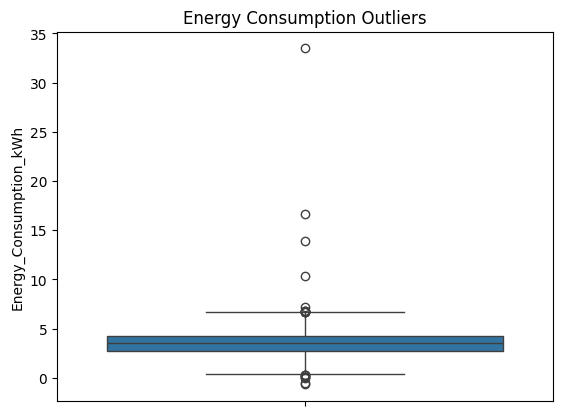

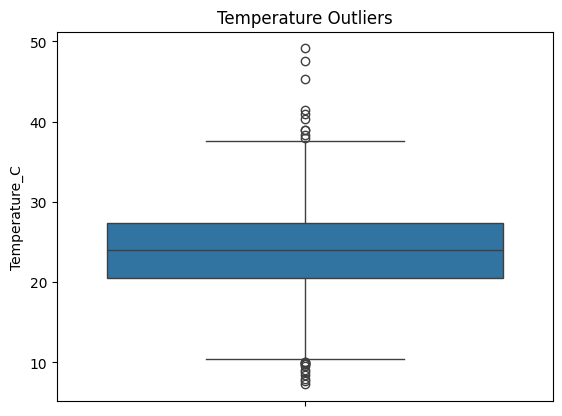

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Energy Consumption
sns.boxplot(df['Energy_Consumption_kWh'])
plt.title('Energy Consumption Outliers')
plt.show()

# Boxplot for Temperature
sns.boxplot(df['Temperature_C'])
plt.title('Temperature Outliers')
plt.show()
# For Energy Consumption
q1_energy = df['Energy_Consumption_kWh'].quantile(0.25)
q3_energy = df['Energy_Consumption_kWh'].quantile(0.75)
iqr_energy = q3_energy - q1_energy

lower_bound_energy = q1_energy - 1.5 * iqr_energy
upper_bound_energy = q3_energy + 1.5 * iqr_energy

df['Energy_Consumption_kWh'] = df['Energy_Consumption_kWh'].clip(lower=lower_bound_energy, upper=upper_bound_energy)

# For Temperature
q1_temp = df['Temperature_C'].quantile(0.25)
q3_temp = df['Temperature_C'].quantile(0.75)
iqr_temp = q3_temp - q1_temp

lower_bound_temp = q1_temp - 1.5 * iqr_temp
upper_bound_temp = q3_temp + 1.5 * iqr_temp

df['Temperature_C'] = df['Temperature_C'].clip(lower=lower_bound_temp, upper=upper_bound_temp)

In [11]:
# Convert the timestamp column to datetime (assuming there is a 'Timestamp' column)
df['Datep'] = pd.to_datetime(df['Date'])

# Check for duplicate timestamps
duplicate_timestamps = df[df.duplicated(subset=['Date'])]
print(f"Number of duplicate timestamps: {len(duplicate_timestamps)}")

# Remove duplicate timestamps
df.drop_duplicates(subset=['Date'], inplace=True)

# Sort the data by timestamp for proper time-series analysis
df.sort_values(by='Date', inplace=True)

# Recheck for any duplicates
print(f"Number of duplicate timestamps after cleaning: {df.duplicated(subset=['Date']).sum()}")


Number of duplicate timestamps: 0
Number of duplicate timestamps after cleaning: 0


In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Normalize 'Energy_Consumption_kWh', 'HVAC_Usage_kWh', 'Kitchen_Usage_kWh', 'Electronics_Usage_kWh'
scaler = StandardScaler()  # Can also use MinMaxScaler if you prefer
df[['Energy_Consumption_kWh', 'HVAC_Usage_kWh', 'Kitchen_Usage_kWh', 'Electronics_Usage_kWh']] = scaler.fit_transform(
    df[['Energy_Consumption_kWh', 'HVAC_Usage_kWh', 'Kitchen_Usage_kWh', 'Electronics_Usage_kWh']])

# Check normalized data
print(df[['Energy_Consumption_kWh', 'HVAC_Usage_kWh', 'Kitchen_Usage_kWh', 'Electronics_Usage_kWh']].head())


      Energy_Consumption_kWh  HVAC_Usage_kWh  Kitchen_Usage_kWh  \
1097               -0.373940        0.637652           0.026303   
632                 0.413682       -2.502423          -1.528755   
1272               -0.194156        0.359417           0.594022   
1901                1.432454       -1.051629           0.519972   
906                -1.135878       -0.614403          -1.454705   

      Electronics_Usage_kWh  
1097              -0.876135  
632               -2.491303  
1272               0.301592  
1901               1.041878  
906               -1.582771  


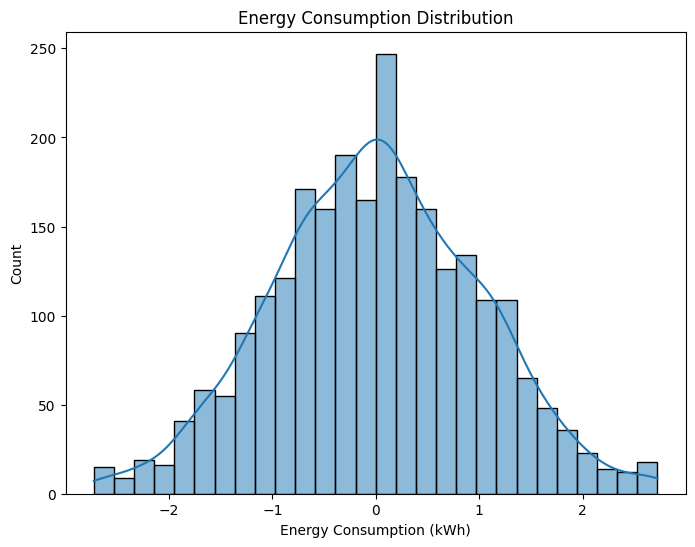

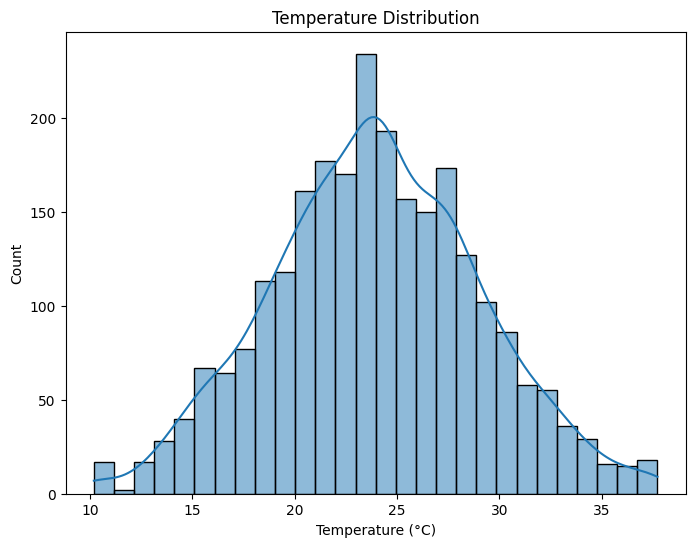

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Energy Consumption
plt.figure(figsize=(8, 6))
sns.histplot(df['Energy_Consumption_kWh'], kde=True)
plt.title('Energy Consumption Distribution')
plt.xlabel('Energy Consumption (kWh)')
plt.show()

# Histogram for Temperature
plt.figure(figsize=(8, 6))
sns.histplot(df['Temperature_C'], kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.show()


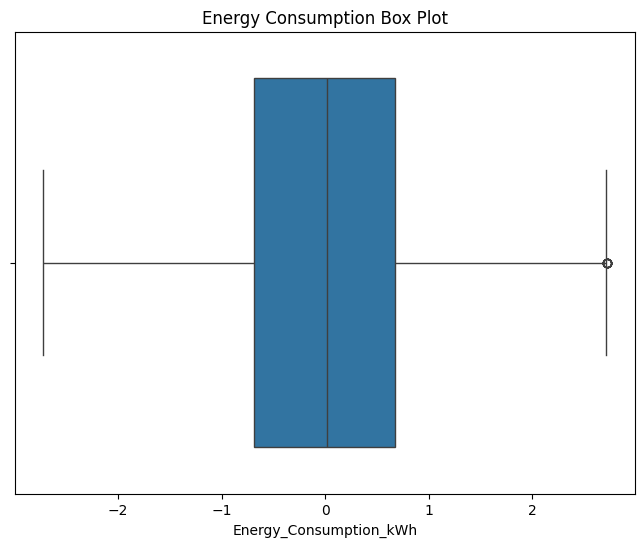

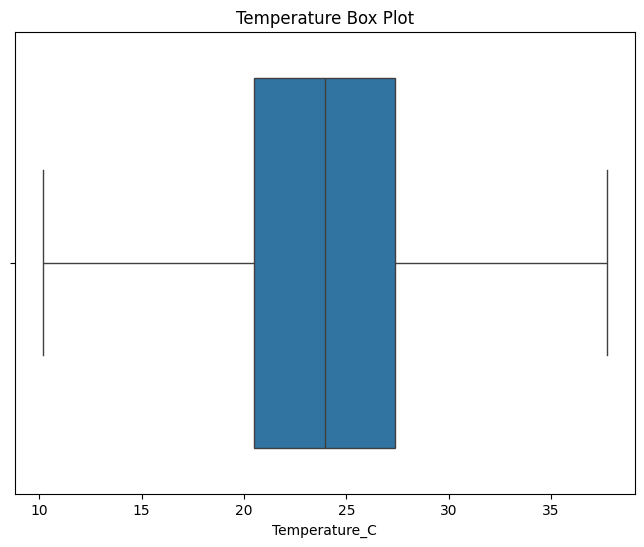

In [14]:
# Boxplot for Energy Consumption
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Energy_Consumption_kWh'])
plt.title('Energy Consumption Box Plot')
plt.show()

# Boxplot for Temperature
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Temperature_C'])
plt.title('Temperature Box Plot')
plt.show()


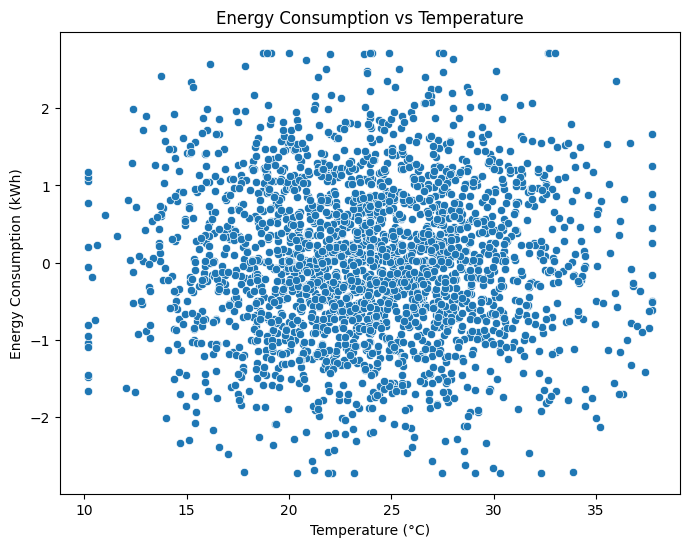

In [15]:
# Scatterplot of Energy Consumption vs Temperature
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Temperature_C'], y=df['Energy_Consumption_kWh'])
plt.title('Energy Consumption vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.show()


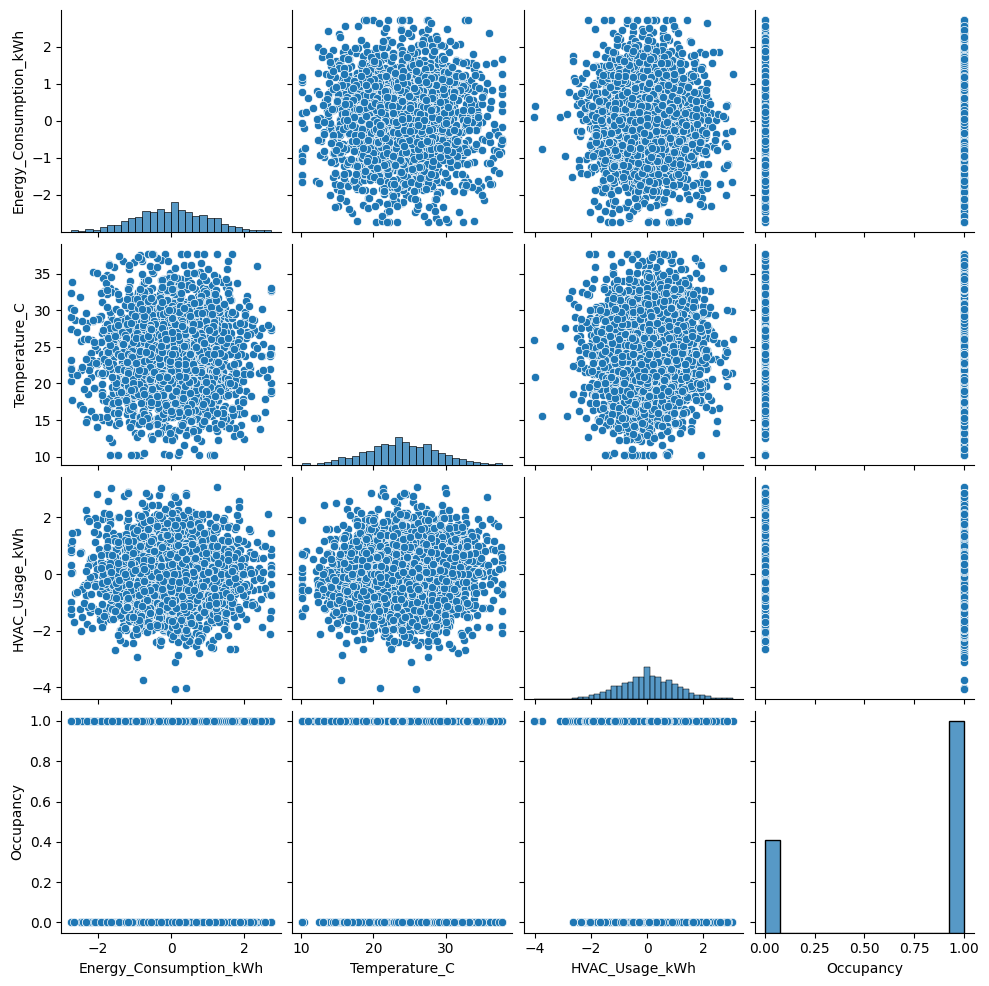

In [16]:
sns.pairplot(df[['Energy_Consumption_kWh', 'Temperature_C', 'HVAC_Usage_kWh', 'Occupancy']])
plt.show()


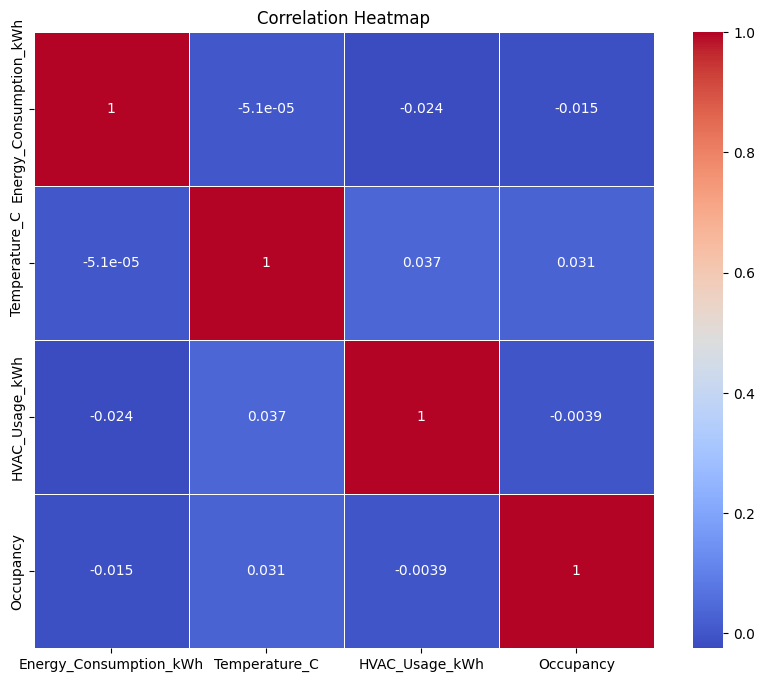

In [19]:
# Correlation matrix and heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df[['Energy_Consumption_kWh', 'Temperature_C', 'HVAC_Usage_kWh', 'Occupancy']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


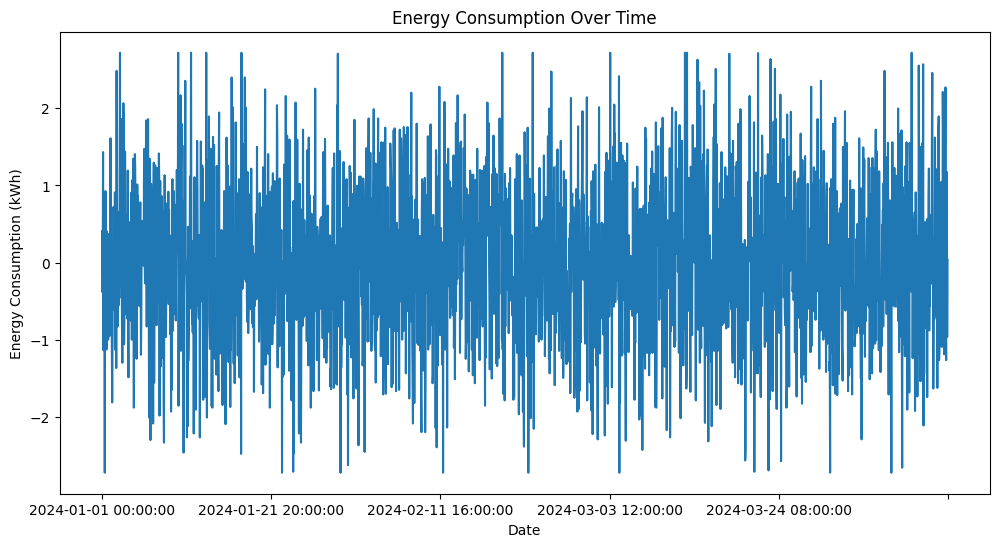

In [17]:
# Assuming 'Date_Time' is the timestamp column
plt.figure(figsize=(12, 6))
df.set_index('Date')['Energy_Consumption_kWh'].plot()
plt.title('Energy Consumption Over Time')
plt.ylabel('Energy Consumption (kWh)')
plt.xlabel('Date')
plt.show()


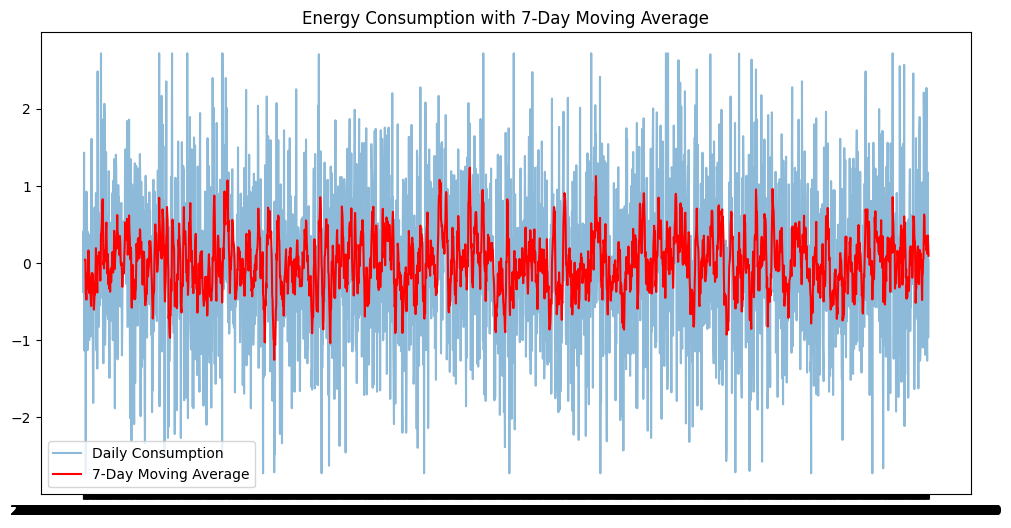

In [18]:
# 7-day moving average for Energy Consumption
df['7_day_avg'] = df['Energy_Consumption_kWh'].rolling(window=7).mean()

# Plot with moving average
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Energy_Consumption_kWh'], label='Daily Consumption', alpha=0.5)
plt.plot(df['Date'], df['7_day_avg'], label='7-Day Moving Average', color='red')
plt.title('Energy Consumption with 7-Day Moving Average')
plt.legend()
plt.show()


In [19]:
# Creating a new feature: Energy consumption per occupant
df['Energy_per_Occupant'] = df['Energy_Consumption_kWh'] / df['Occupancy']
print(df['Energy_per_Occupant'])


1097        -inf
632     0.413682
1272   -0.194156
1901    1.432454
906         -inf
          ...   
2480   -1.264295
2125    0.199654
2490    1.175620
1033   -0.964656
1437    0.036993
Name: Energy_per_Occupant, Length: 2500, dtype: float64


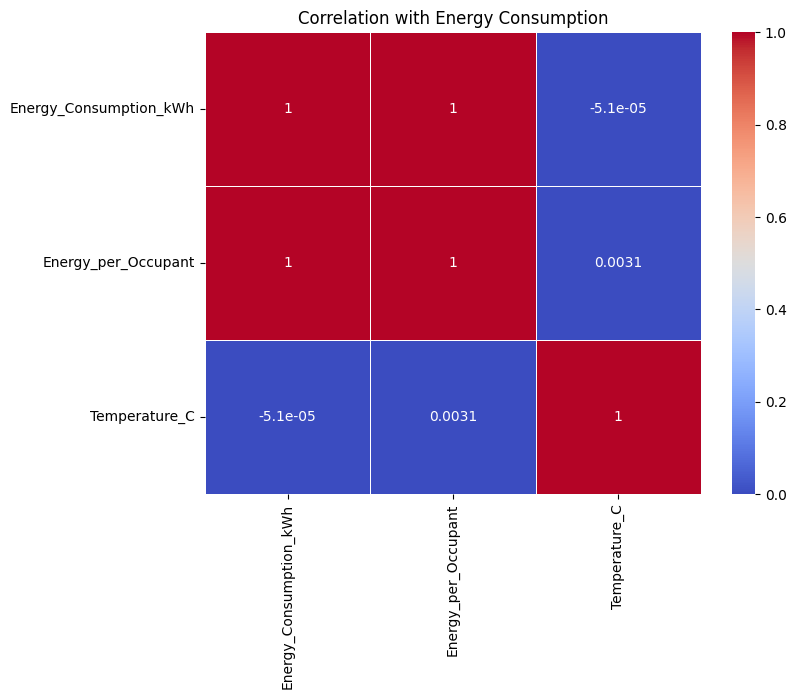

In [20]:
# Correlation matrix including new features
new_features = ['Energy_per_Occupant', 'Temperature_C']
corr_matrix = df[['Energy_Consumption_kWh'] + new_features].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation with Energy Consumption')
plt.show()


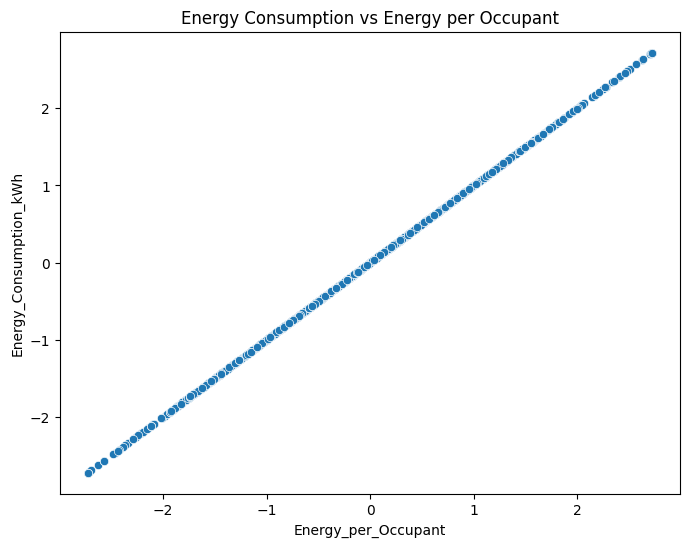

In [21]:
# Scatterplot of Energy Consumption per Occupant vs Energy Consumption
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Energy_per_Occupant'], y=df['Energy_Consumption_kWh'])
plt.title('Energy Consumption vs Energy per Occupant')
plt.show()


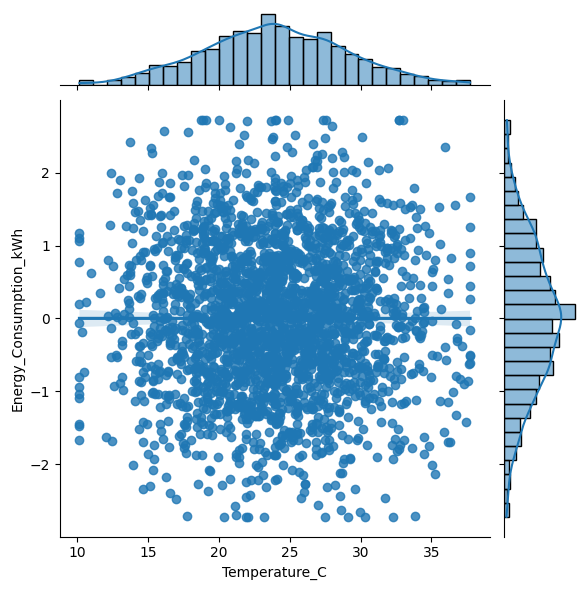

In [22]:
# Joint plot for Energy Consumption vs Temperature
sns.jointplot(x='Temperature_C', y='Energy_Consumption_kWh', data=df, kind='reg')
plt.show()


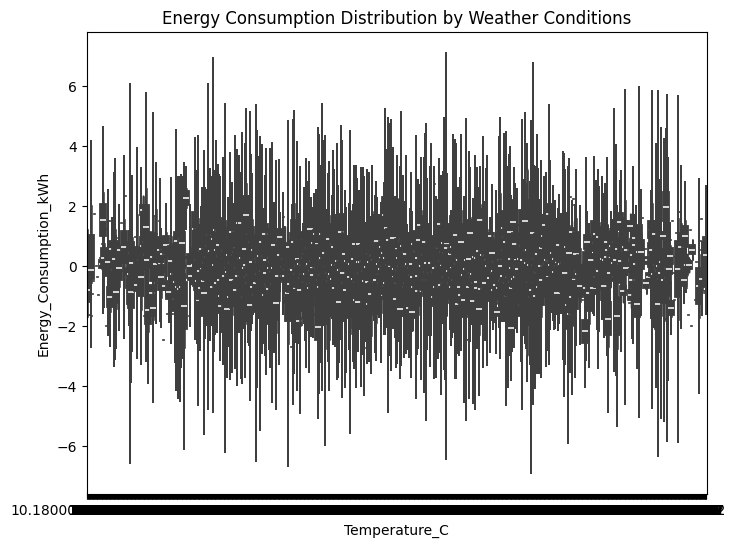

In [23]:
# Violin plot for Energy Consumption by Weather Conditions
plt.figure(figsize=(8, 6))
sns.violinplot(x='Temperature_C', y='Energy_Consumption_kWh', data=df)
plt.title('Energy Consumption Distribution by Weather Conditions')
plt.show()


In [24]:
!pip install nbformat --upgrade
import plotly.express as px
import plotly.io as pio

# Set the renderer to 'browser' to open the plot in a web browser
pio.renderers.default = 'browser'

# Interactive scatter plot of Energy Consumption vs Temperature
fig = px.scatter(df, x='Temperature_C', y='Energy_Consumption_kWh', color='Occupancy',
                 title='Energy Consumption vs Temperature (Interactive)')
fig.show()



Defaulting to user installation because normal site-packages is not writeable


In [25]:
from sklearn.model_selection import train_test_split

# Sort data by timestamp to maintain time-series consistency
df = df.sort_values(by='Date')

# Define feature columns and target variable
features = ['Temperature_C', 'Humidity_%', 'HVAC_Usage_kWh', 'Occupancy', 'Energy_per_Occupant']  # Include relevant features
target = 'Energy_Consumption_kWh'

# Split data while preserving the time-series order (e.g., 80% training, 20% testing)
split_ratio = 0.8
split_index = int(len(df) * split_ratio)

train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]

# Separate features and target variable for training and testing
X_train, y_train = train_data[features], train_data[target]
X_test, y_test = test_data[features], test_data[target]


In [27]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Check for infinity or very large values in the dataset
print("Checking for infinity values in X_train and X_test:")
print(np.isinf(X_train).sum())
print(np.isinf(X_test).sum())

# Replace infinity values with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with column means
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Verify there are no infinity or NaN values left in the data
print("Checking again for infinity or NaN values after cleaning:")
print(np.isinf(X_train).sum())
print(np.isnan(X_train).sum())

print(np.isinf(X_test).sum())
print(np.isnan(X_test).sum())

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

print("Predictions:", y_pred)


Checking for infinity values in X_train and X_test:
Temperature_C          0
Humidity_%             0
HVAC_Usage_kWh         0
Occupancy              0
Energy_per_Occupant    0
dtype: int64
Temperature_C          0
Humidity_%             0
HVAC_Usage_kWh         0
Occupancy              0
Energy_per_Occupant    0
dtype: int64
Checking again for infinity or NaN values after cleaning:
Temperature_C          0
Humidity_%             0
HVAC_Usage_kWh         0
Occupancy              0
Energy_per_Occupant    0
dtype: int64
Temperature_C          0
Humidity_%             0
HVAC_Usage_kWh         0
Occupancy              0
Energy_per_Occupant    0
dtype: int64
Temperature_C          0
Humidity_%             0
HVAC_Usage_kWh         0
Occupancy              0
Energy_per_Occupant    0
dtype: int64
Temperature_C          0
Humidity_%             0
HVAC_Usage_kWh         0
Occupancy              0
Energy_per_Occupant    0
dtype: int64
Predictions: [ 0.09918232 -0.37848327 -0.92073856 -0.05856277 

C:\Users\aanus\AppData\Local\Temp\ipykernel_19464\3617861895.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\aanus\AppData\Local\Temp\ipykernel_19464\3617861895.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\aanus\AppData\Local\Temp\ipykernel_19464\3617861895.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\aanus\AppData\Local\Temp\ipykernel_19464\3617861895.py:15: SettingWithCopyWarning:


A v

In [28]:
from sklearn.metrics import mean_absolute_error, r2_score

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r_squared}")


Mean Absolute Error (MAE): 0.22619585204246329
R-squared: 0.727635023255599


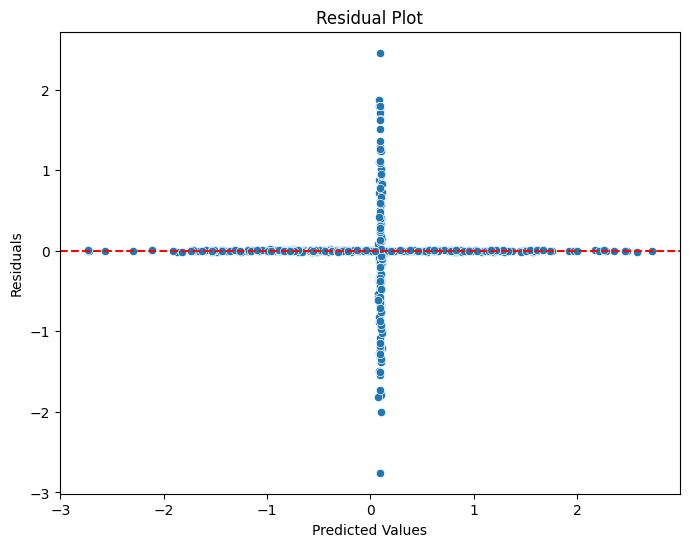

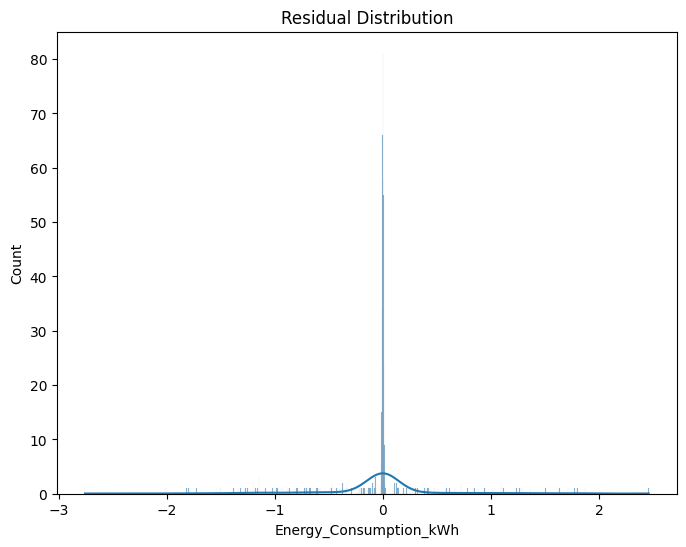

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals to check for patterns
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Optionally, check the distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')
plt.show()


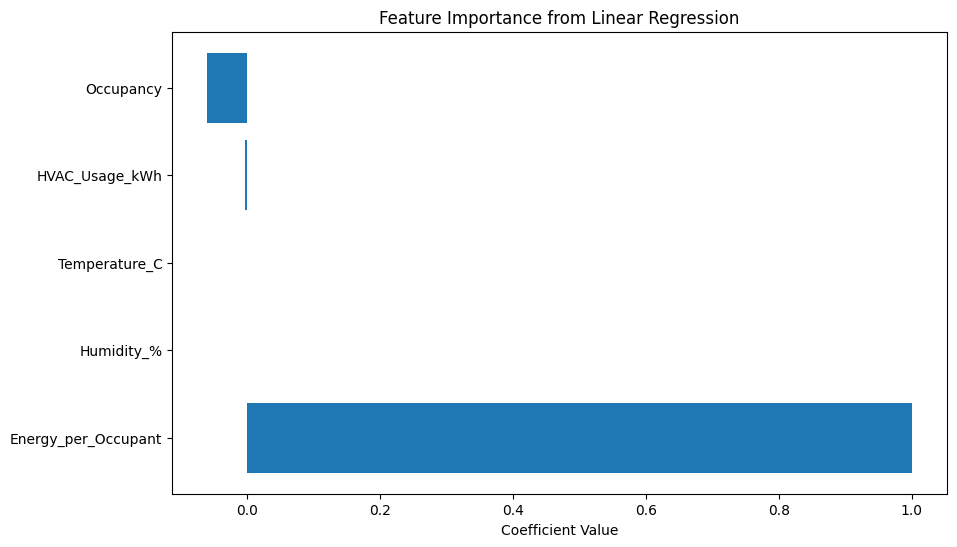

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Assuming you have your model trained as 'model' and your feature names
coefficients = model.coef_
feature_names = X_train.columns

# Create a DataFrame for easier visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
importance_df = importance_df.sort_values(by='Coefficient', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance from Linear Regression')
plt.show()


In [31]:
def predict_energy_consumption(input_data):
    return model.predict(input_data)


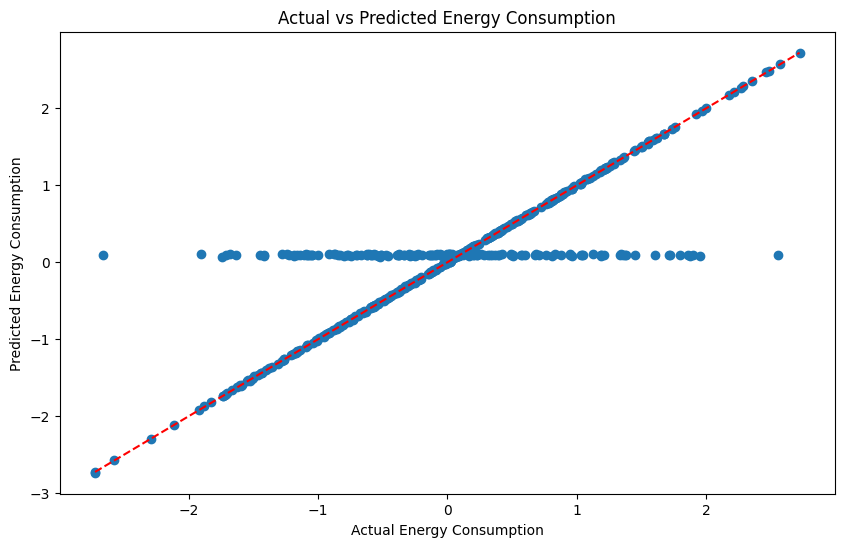

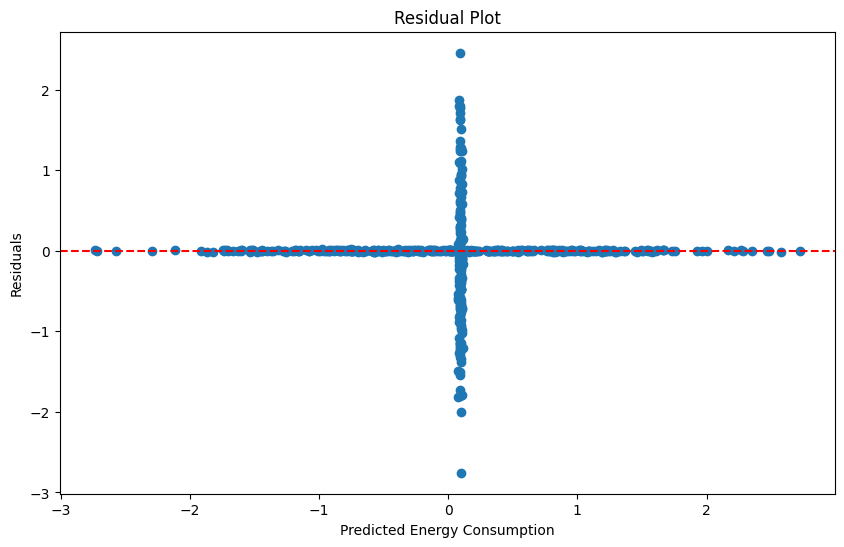

In [32]:
# Making predictions
y_pred = model.predict(X_test)

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Actual vs Predicted Energy Consumption')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Energy Consumption')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


Mean Absolute Error: 0.22619585204246329
Mean Squared Error: 0.2591309860193084
R-squared: 0.727635023255599
